### Team name: KLAM

**Members of Team:**  
+ Andres Obando
+ Luis Carlos Peña
+ Alexander Vega
+ Klaus Rodriguez

# Project 2


# Movie Genre Classification

Classify a movie genre based on its plot.

## What we did?

In this opportunity we implement a model with words and characters n-grams

This notebook shows how we implemented our model and the process to construct the API    

## 1. Algorithm to classify a movie genre based on its plot

In [2]:
#installing libraries

import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_union
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
wordnet_lemmatizer = WordNetLemmatizer()

In [3]:
#importing databases

import os
    
train = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
test = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [4]:
#create a list with the name of all movies genres

class_names = ['p_Action', 'p_Adventure', 'p_Animation', 'p_Biography', 'p_Comedy', 'p_Crime', 'p_Documentary', 'p_Drama', 'p_Family',
               'p_Fantasy', 'p_Film-Noir', 'p_History', 'p_Horror', 'p_Music', 'p_Musical', 'p_Mystery', 'p_News', 'p_Romance',
               'p_Sci-Fi', 'p_Short', 'p_Sport', 'p_Thriller', 'p_War', 'p_Western']

In [5]:
train['genres'] = train['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(train['genres'])
res = pd.DataFrame(y_genres, index=train.index, columns=class_names)
res.head()

,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,p_Fantasy,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
3107,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
900,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6724,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4704,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2582,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


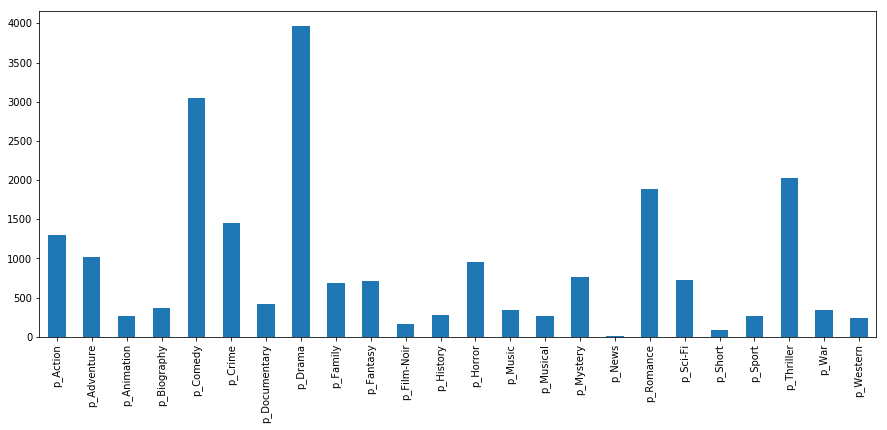

In [6]:
#number of times a genre appears in a movie in the train database

df = res[list(res)].sum(axis=0)
df.plot(kind = "bar",figsize=(15,6),rot = 90)

In [7]:
ceros=[]
unos=[]
for class_name in class_names:
    ceros.append(res[class_name].value_counts()[0])
    unos.append(res[class_name].value_counts()[1])

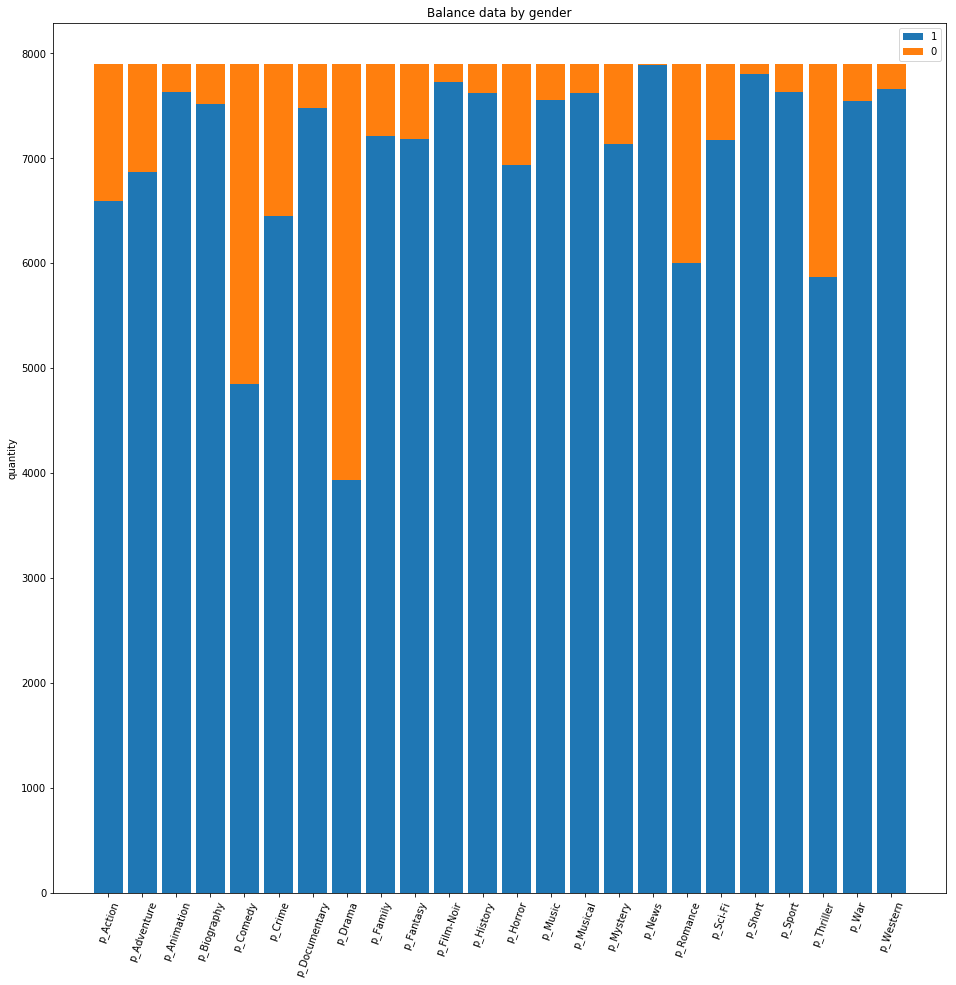

In [8]:
width = 0.85       
plt.figure(figsize=(16,16))
p1 = plt.bar(np.arange(24), ceros, width)
p2 = plt.bar(np.arange(24), unos, width,bottom=ceros)

plt.ylabel('quantity')
plt.title('Balance data by gender')
plt.xticks(np.arange(24), class_names, rotation=70)
plt.legend((p1[0], p2[0]), ('1', '0'))
plt.show()

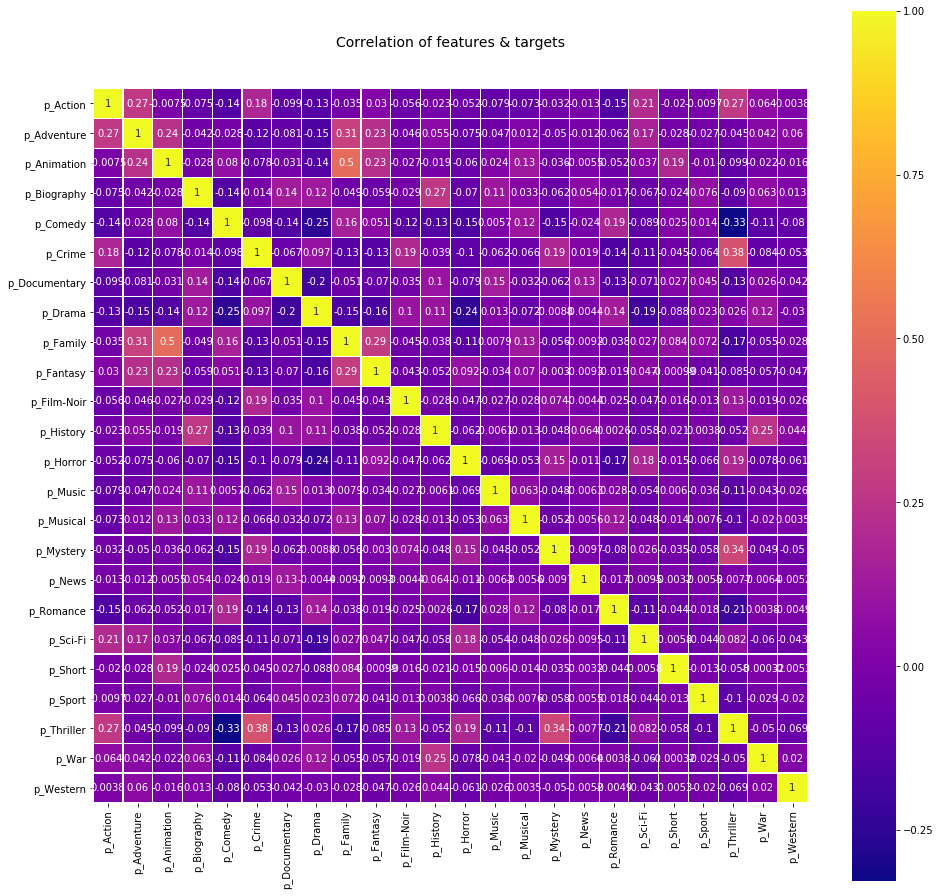

In [9]:
#correlation between movie genres
import seaborn as sns
colormap = plt.cm.plasma
plt.figure(figsize=(16,16))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(res.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [10]:
#here we paste the plot of the train and test databases 
train_text = train['plot']
test_text = test['plot']
all_text = pd.concat([train_text, test_text])
print(train_text.shape)
print(test_text.shape)
print(all_text.shape)

(7895,)
(3383,)
(11278,)


In [11]:
print(train_text.isnull().sum())
print(test_text.isnull().sum())

0
0


### Initially we implemented a OneVsRestClassifier model using random forest and XGB as classifiers and best results we obtained were:

In [ ]:
#OneVsRestClassifier model using random forest as classifier

dataTraining = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

#Create CountVectorizer
vect = CountVectorizer(max_features=9000,stop_words='english',lowercase=False,analyzer=split_into_lemmas)
X_dtm = vect.fit_transform(dataTraining['plot'])
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.25, random_state=42)  #split in train and test

clf = OneVsRestClassifier(RandomForestClassifier(n_jobs=-1, n_estimators=2000, max_depth=12, random_state=42))
clf.fit(X_train, y_train_genres)
y_pred_genres = clf.predict_proba(X_test)
mcRandomTxt_AUC=roc_auc_score(y_test_genres, y_pred_genres, average='macro')
print('Random Forest model score is: ' ,mcRandomTxt_AUC, 'AUC.')

Random Forest model score is:  0.8478262655145848 AUC.

In [ ]:
#OneVsRestClassifier model using XGB as classifier

dataTraining = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word) for word in words]

vect = CountVectorizer(max_features=9000,stop_words='english',lowercase=True,analyzer=split_into_lemmas)
X_dtm = vect.fit_transform(dataTraining['plot'])
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x))
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
X_train, X_test, y_train_genres, y_test_genres = train_test_split(X_dtm, y_genres, test_size=0.25, random_state=42)


objective = "multi:softprob"
seed = 42
n_estimators = 50
max_depth=19

gbm = OneVsRestClassifier(xgb.XGBClassifier(objective = objective,num_class = 24,seed = seed,max_depth=max_depth,n_jobs=-1))
gbm.fit(X_train,y_train_genres)

y_pred_genres = gbm.predict_proba(X_test)
mcRandomTxt_AUC=roc_auc_score(y_test_genres, y_pred_genres, average='macro')
print('Random Forest model score is: ' ,mcRandomTxt_AUC, 'AUC.')

Random Forest model score is:  0.8547294773524525 AUC.


### Then we implemented a model with words and characters n-grams using logistic as classifier

In [11]:
  
word_vectorizer = TfidfVectorizer(   # tiidf as numerical statistic
    stop_words = 'english',          # eliminating stopwords in english
    sublinear_tf=True,               # apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).
    strip_accents='unicode',
    analyzer='word',                 # whether the feature should be made of word or character n-grams
    token_pattern=r'\w{1,}',         # regular expression denoting what constitutes a “token”
    ngram_range=(1, 1),              # number of n-grams
    max_features=9000,               # max features to consider
    )
char_vectorizer = TfidfVectorizer(   #the same as before but using analizer='char' not words, and n-gram(1,1)
    stop_words = 'english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char'
    #ngram_range=(2, 6),
    max_features=9000,
    )
vectorizer = make_union(word_vectorizer, char_vectorizer, n_jobs=-1)   # construct a union from the given transformers (word_vectorizer and char_vectorizer)

In [12]:
# fit in all text and transform in train and test text

vectorizer.fit(all_text)  
train_features = vectorizer.transform(train_text)
test_features = vectorizer.transform(test_text)

In [27]:
scores = []
submission = pd.DataFrame.from_dict({'ID': test.index})
for class_name in class_names:
    train_target = res[class_name]
    classifier = LogisticRegression(solver="sag",n_jobs=-1, C= 0.7,max_iter=1000)
    if class_name == "p_News":
      cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=7, scoring='roc_auc'))       
    else:
      cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=50, scoring='roc_auc'))
        
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))
    #print(str(class_name))

    classifier.fit(train_features, train_target)
    submission[class_name] = classifier.predict_proba(test_features)[:, 1]

print('Total CV score is {}'.format(np.mean(scores)))

CV score for class p_Action is 0.8924083201691344
CV score for class p_Adventure is 0.8960636985990841
CV score for class p_Animation is 0.9299325192065129
CV score for class p_Biography is 0.8697502522863451
CV score for class p_Comedy is 0.8267528085272191
CV score for class p_Crime is 0.900247002031065
CV score for class p_Documentary is 0.9826964578672633
CV score for class p_Drama is 0.7879225643901577
CV score for class p_Family is 0.9109318712896299
CV score for class p_Fantasy is 0.8822504810004809
CV score for class p_Film-Noir is 0.914516129032258
CV score for class p_History is 0.9014917440660475
CV score for class p_Horror is 0.9369078851335408
CV score for class p_Music is 0.9211668658400969
CV score for class p_Musical is 0.8717182662538702
CV score for class p_Mystery is 0.8671021455070751
CV score for class p_News is 0.9409288333892079
CV score for class p_Romance is 0.8381701954237839
CV score for class p_Sci-Fi is 0.9350978835978836
CV score for class p_Short is 0.895

In [24]:
#here we changed the cv=20

scores = []
#submission = pd.DataFrame.from_dict({'id': test['id']})
submission = pd.DataFrame.from_dict({'ID': test.index})
for class_name in class_names:
    train_target = res[class_name]
    classifier = LogisticRegression(solver="sag",n_jobs=-1, C= 0.7,max_iter=1000)
    if class_name == "p_News":
      cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=7, scoring='roc_auc'))      
    else:
      cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=20, scoring='roc_auc'))
        
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))
    #print(str(class_name))

    classifier.fit(train_features, train_target)
    submission[class_name] = classifier.predict_proba(test_features)[:, 1]

print('Total CV score is {}'.format(np.mean(scores)))

CV score for class p_Action is 0.8920852615040236
CV score for class p_Adventure is 0.8954627913969064
CV score for class p_Animation is 0.9293798882268192
CV score for class p_Biography is 0.8669902777241466
CV score for class p_Comedy is 0.8272719727350097
CV score for class p_Crime is 0.8996452964669144
CV score for class p_Documentary is 0.9818338378490564
CV score for class p_Drama is 0.786800938297726
CV score for class p_Family is 0.911645019734579
CV score for class p_Fantasy is 0.8811600136082494
CV score for class p_Film-Noir is 0.9119718471584409
CV score for class p_History is 0.9038353907432934
CV score for class p_Horror is 0.9363539033286512
CV score for class p_Music is 0.922734871202304
CV score for class p_Musical is 0.8676341340840249
CV score for class p_Mystery is 0.8663720791031903
CV score for class p_News is 0.9410555921672531
CV score for class p_Romance is 0.8375730932353148
CV score for class p_Sci-Fi is 0.933805173596902
CV score for class p_Short is 0.89128

In [28]:
# here we implemented the model without max features in the TfidfVectorizer 
  
word_vectorizer = TfidfVectorizer(
    stop_words = 'english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 1),
    #max_features=9000,
    )
char_vectorizer = TfidfVectorizer(
    stop_words = 'english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    #ngram_range=(2, 6),
    #max_features=9000,
    )
vectorizer = make_union(word_vectorizer, char_vectorizer, n_jobs=-1)

In [29]:
vectorizer.fit(all_text)   
train_features = vectorizer.transform(train_text)
test_features = vectorizer.transform(test_text)

In [30]:
scores = []

submission = pd.DataFrame.from_dict({'ID': test.index})
for class_name in class_names:
    train_target = res[class_name]
    classifier = LogisticRegression(solver="sag",n_jobs=-1, C= 0.7,max_iter=1000)
    if class_name == "p_News":
      cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=7, scoring='roc_auc'))      
    else:
      cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=50, scoring='roc_auc'))
        
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))
    #print(str(class_name))

    classifier.fit(train_features, train_target)
    submission[class_name] = classifier.predict_proba(test_features)[:, 1]

print('Total CV score is {}'.format(np.mean(scores)))

CV score for class p_Action is 0.8942327166754649
CV score for class p_Adventure is 0.8962368006125543
CV score for class p_Animation is 0.9333160761380576
CV score for class p_Biography is 0.8675251182592243
CV score for class p_Comedy is 0.8294213712138283
CV score for class p_Crime is 0.901052864672834
CV score for class p_Documentary is 0.9825303504847129
CV score for class p_Drama is 0.790828243953344
CV score for class p_Family is 0.9143479642962401
CV score for class p_Fantasy is 0.8872528536278536
CV score for class p_Film-Noir is 0.9113651724619466
CV score for class p_History is 0.9007538699690403
CV score for class p_Horror is 0.9377547755845668
CV score for class p_Music is 0.923349682152401
CV score for class p_Musical is 0.8741789932347207
CV score for class p_Mystery is 0.8675184920713089
CV score for class p_News is 0.938393545253897
CV score for class p_Romance is 0.8396616889834593
CV score for class p_Sci-Fi is 0.9365406722906724
CV score for class p_Short is 0.90055

## Finally we tunned the parameters and got the best results with the following model

In [122]:
# A model without max features, with (2,6) grams in the char_vectorizer, a C=0.85 in the logistic regression and cv=50 in the
#cross validation splitting strategy
  
word_vectorizer = TfidfVectorizer(
    stop_words = 'english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 1),
    #max_features=30000,
    )
char_vectorizer = TfidfVectorizer(
    stop_words = 'english',
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    #analyzer=split_into_lemmas,
    ngram_range=(2, 6),
    #max_features=30000,
    )
vectorizer = make_union(word_vectorizer, char_vectorizer, n_jobs=-1)

In [123]:
vectorizer.fit(all_text)
train_features = vectorizer.transform(train_text)
test_features = vectorizer.transform(test_text)

In [124]:
scores = []
submission = pd.DataFrame.from_dict({'ID': test.index})
for class_name in class_names:
    train_target = res[class_name]
    classifier = LogisticRegression(solver="sag",n_jobs=-1, C= 0.85,max_iter=1000,class_weight='auto')
    if class_name == "p_News":
      cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=7, scoring='roc_auc'))      
    else:
      cv_score = np.mean(cross_val_score(classifier, train_features, train_target, cv=50, scoring='roc_auc'))
        
    scores.append(cv_score)
    print('CV score for class {} is {}'.format(class_name, cv_score))
    #print(str(class_name))

    classifier.fit(train_features, train_target)
    submission[class_name] = classifier.predict_proba(test_features)[:, 1]

print('Total CV score is {}'.format(np.mean(scores)))

CV score for class p_Action is 0.8962137786819722
CV score for class p_Adventure is 0.8988926468291748
CV score for class p_Animation is 0.9381762412567367
CV score for class p_Biography is 0.8713770261747082
CV score for class p_Comedy is 0.8325864593309295
CV score for class p_Crime is 0.9037302875114561
CV score for class p_Documentary is 0.9818072955505842
CV score for class p_Drama is 0.7957257496949454
CV score for class p_Family is 0.9191747979032462
CV score for class p_Fantasy is 0.8924708254708256
CV score for class p_Film-Noir is 0.9105925150118699
CV score for class p_History is 0.9061417841990598
CV score for class p_Horror is 0.941829856938248
CV score for class p_Music is 0.9214388620558017
CV score for class p_Musical is 0.8751183350533194
CV score for class p_Mystery is 0.8683001657966447
CV score for class p_News is 0.918112591064249
CV score for class p_Romance is 0.8416896839205452
CV score for class p_Sci-Fi is 0.9390755540755539
CV score for class p_Short is 0.899

In [125]:
submission.head()

,ID,p_Action,p_Adventure,p_Animation,p_Biography,p_Comedy,p_Crime,p_Documentary,p_Drama,p_Family,...,p_Musical,p_Mystery,p_News,p_Romance,p_Sci-Fi,p_Short,p_Sport,p_Thriller,p_War,p_Western
0,1,0.109402,0.062982,0.027436,0.027521,0.313207,0.102471,0.019545,0.469887,0.052635,...,0.043273,0.074596,0.000849,0.610781,0.039757,0.010908,0.019647,0.155667,0.021688,0.029135
1,4,0.122413,0.042126,0.027116,0.133897,0.257285,0.303245,0.055677,0.858016,0.032976,...,0.028511,0.029327,0.001025,0.080350,0.015917,0.013753,0.031979,0.245519,0.044187,0.021336
2,5,0.092774,0.030700,0.009339,0.048214,0.097022,0.706677,0.013919,0.759604,0.017691,...,0.016817,0.380272,0.000932,0.151482,0.037760,0.006037,0.019846,0.625725,0.021681,0.015544
3,6,0.118409,0.105474,0.016112,0.045164,0.152329,0.064490,0.027216,0.686125,0.042683,...,0.028553,0.084055,0.000899,0.169138,0.092334,0.007580,0.025222,0.326507,0.070337,0.025419
4,7,0.062810,0.077640,0.028757,0.026630,0.189322,0.085234,0.023167,0.387471,0.051177,...,0.021772,0.080304,0.000856,0.160430,0.391985,0.010576,0.012349,0.346703,0.017171,0.017387


In [126]:
submission.to_csv('submission_RL_AUC_.csv', index=False)

In [ ]:
from sklearn.externals import joblib
joblib.dump(classifier, 'predict_genre.pkl', compress=3)
joblib.dump(vectorizer, 'vectorizer.pkl', compress=3)

## 2. API DEPLOYMENT

To deploy this project we use an API created on Dash $^{TM}$ by Plotly. To create the API, we created two scripts separated, one that contain the function that loads the model and the vectorizer saved previoulsy on a pickle file. The function return two predictions, the probabilty and the classification.

In [ ]:
# Importing the packages
import pandas as pd
from sklearn.externals import joblib
import os

# definig the function:
# Tiitle', 'Year', 'Plot'
def predict_genre(title, plot, year):
    class_names = ['Action', 'Adventure', 'Animation', 'Biography', 
                   'Comedy', 'Crime', 'Documentary', 'Drama', 
                   'Family', 'Fantasy', 'Film-Noir', 'History', 
                   'Horror', 'Music', 'Musical', 'Mystery', 'News', 
                   'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 
                   'War', 'Western']

    thispath = os.path.dirname(__file__)
    
    # Vectorizer
    vector = joblib.load(thispath + '/vectorizer.pkl')
    test_features = vector.transform([plot])
    
    # Model predicting
    clf = joblib.load(thispath + '/predict_genre.pkl') 
     
    y_pred = clf.predict_proba(test_features)
    y_pred2 = clf.predict(test_features)
    probability = pd.DataFrame(y_pred, columns=class_names)
    prediction = pd.DataFrame(y_pred2, columns=class_names)


    return probability, prediction

In the following script we create the API

In [ ]:
import dash
import dash_html_components as html
import dash_core_components as dcc
import pandas as pd

#external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
internal_styles = 'assets'
# Import model
from P2_moviegenrepredictor_V0 import *

app = dash.Dash(__name__, assets_folder=internal_styles)

API_GenrePred=app.server
app.tittle = 'Genre prediction V0'


app.layout = html.Div([
        html.Div(                
                [
                 html.H1(children="Genre Predictor",
                         className='nine columns'),
                html.Img(
                        src='assets/logo-uniandes.png',
                        className='one columns',
                        style={
                            'height': '12%',
                            'width': '12%',
                            'float': 'right',
                            'position': 'relative',
                            'padding-top': 1,
                            'padding-right': 0
                        },
                        ),

                        html.Div(
                                [dcc.Markdown(children='''**Created by:**  
                                                    *Andres Mauricio Obando*  
                                                    *Luis Carlos Peña*  
                                                    *Alexander Vega*  
                                                    *Klaus Rodriguez*  
                                                    ''')],
                                 className='six columns'
                                 ),
                        ], className="row"
                
                ),
        
        html.Div(dcc.Input(
            id='input-box', 
            type='text', 
            style={'width': '100%'}
            ), className='row'),
    
        html.Button('Submit', id='button'),
        html.Div(id='output-container-button',
             children='Enter a value and press submit')
])


@app.callback(
    dash.dependencies.Output('output-container-button', 'children'),
    [dash.dependencies.Input('button', 'n_clicks')],
    [dash.dependencies.State('input-box', 'value')])
def update_output(n_clicks, value):
#    return 'The input value was "{}" and the button has been clicked {} times'.format(
#        value,
#        n_clicks
#    )
    prob,pred = predict_genre(title='',
                              plot=value,
                              year=0)
    
    genres = prob.stack()
    res = pred.stack()[0]
    a = pd.DataFrame(data=res, columns=['prediction'])
    b = a[a['prediction']==1]
    
    texto='Genres predicted:\n'
    for row in b.iterrows():
        c = row[0]
        texto = texto + str(c) + '\n'        
        
    return texto
    #return 'output \n{}'.format(prob.stack())

if __name__ == '__main__':
    app.run_server(debug=True, host='0.0.0.0', port=8080)

It is important to remark that the deploy requires indicate the host and the port because this parameters are configured on the AWS IC2 to let the access to public

On the instance of AWS we load this files and run it with the command: `nohup python API_GenrePred.py &`. This keeps the API run.  
The API is located on: http://3.14.64.170:8080/  
And we can access to with the host name http://genrepred.tk/

![title](https://github.com/andaoba/MachineLearningCourse/raw/master/img_API_GenrePred/API1.png)

In [ ]:
##############   